In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-football-injury-prediction-dataset/data.csv


In [2]:
# FOR HANDLING OF WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# IMPORT DATASET

df = pd.read_csv("/kaggle/input/university-football-injury-prediction-dataset/data.csv")
df

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,22,182,63,Goalkeeper,10.624037,33,1,72.678400,84.620355,240.117111,74.372627,5.789511,78.812645,7.631547,70.472112,78.795865,0,1,19.019442
796,21,181,66,Defender,9.732842,11,2,67.290644,70.726745,260.341118,85.392132,5.591874,81.302513,7.676296,67.209293,79.008597,1,1,20.145905
797,24,182,75,Goalkeeper,5.494318,17,3,81.164089,83.486771,264.192657,84.031046,5.466771,69.857954,6.798035,78.213353,74.379626,0,1,22.642193
798,20,188,86,Goalkeeper,10.303923,35,1,71.184901,85.585050,204.446478,84.417342,6.543996,73.459174,8.846476,50.906356,70.320367,1,0,24.332277


## 🎯 Overview
    This dataset contains comprehensive data from 800 Chinese university football players 
    participating in collegiate and provincial leagues. 
    The goal is to predict whether a player will suffer an injury in the next academic season 
    using machine learning classification methods.

📊 Dataset Details
    • Samples: 800 university football players
    • Features: 18 input features + 1 target label
    • Task: Binary classification (0 = No injury, 1 = Injury)
    • Balance: Well-balanced dataset
    • Age Range: 18-24 years (typical university students)

🏃‍♂️ Feature Categories
    1. Physical Characteristics (4 features)
        - Age
        - Height
        - Weight
        - BMI
        (Measured through standard university health checkups)

    2. Football-Specific Metrics (4 features)
        - Playing position
        - Training hours per week
        - Matches played
        - Previous injury count
        (Collected from official records and coach evaluations)

    3. Physical Fitness Assessment (6 features)
        - Knee strength
        - Hamstring flexibility
        - Reaction time
        - Balance
        - Sprint speed
        - Agility
        (Professional fitness testing using standardized protocols)

    4. Lifestyle Factors (3 features)
        - Sleep hours
        - Stress level
        - Nutrition quality
        (Self-reported surveys and validated questionnaires)

    5. Training Compliance (1 feature)
        - Warm-up routine adherence (0 = Poor, 1 = Good)


## DIVE INTO DATASET

In [4]:
# LETS UNDERSTAND THE DATASET
print("shape of dataset ",df.shape)
print("====================\n")
print("columns name are :- ",df.columns)
print("====================\n")
print("infromation of all columns present in the datset \n",df.info())
print("====================\n")
print(" analysis of numerical columns \n",df.describe())
print("====================")
print("analyis of non-numerical feature \n",df.describe(include="O"))

shape of dataset  (800, 19)

columns name are :-  Index(['Age', 'Height_cm', 'Weight_kg', 'Position', 'Training_Hours_Per_Week',
       'Matches_Played_Past_Season', 'Previous_Injury_Count',
       'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
       'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score',
       'Sleep_Hours_Per_Night', 'Stress_Level_Score',
       'Nutrition_Quality_Score', 'Warmup_Routine_Adherence',
       'Injury_Next_Season', 'BMI'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-nu

In [5]:
# lets understand distribution of data
for i in df.columns:
    print(f"unique values in {i}")
    print(df[i].value_counts())
    print("\n-----------------\n")

unique values in Age
Age
24    129
21    121
22    118
23    115
19    114
20    105
18     98
Name: count, dtype: int64

-----------------

unique values in Height_cm
Height_cm
177    52
175    46
174    44
178    44
176    42
173    40
179    40
185    38
181    38
180    38
172    33
182    30
183    30
169    28
184    28
171    22
170    20
168    20
187    18
186    18
167    17
188    16
165    14
189    12
166    11
193    10
191    10
164     9
190     8
163     5
162     4
154     2
192     2
159     2
198     2
197     1
200     1
196     1
158     1
160     1
194     1
157     1
Name: count, dtype: int64

-----------------

unique values in Weight_kg
Weight_kg
71     43
75     37
69     36
76     36
72     31
83     30
81     30
78     29
80     29
74     28
68     26
73     25
65     25
82     24
77     24
64     24
70     22
63     20
60     18
79     18
61     18
66     17
85     17
67     15
86     15
58     15
59     14
62     14
88     13
89     13
91     11
92      8

In [6]:
# lets distribute these feature on the basic of values distribution
cate = ["Age","Warmup_Routine_Adherence","Previous_Injury_Count","Position"]
almostcat = ["Matches_Played_Past_Season","Weight_kg","Height_cm"]
numerical = list(df.drop(columns = ["Age","Injury_Next_Season","Warmup_Routine_Adherence","Previous_Injury_Count","Position","Matches_Played_Past_Season","Weight_kg","Height_cm"]))

In [7]:
# lets check for null and duplicate values
print(df.isna().any())
print(df.duplicated().any())


Age                           False
Height_cm                     False
Weight_kg                     False
Position                      False
Training_Hours_Per_Week       False
Matches_Played_Past_Season    False
Previous_Injury_Count         False
Knee_Strength_Score           False
Hamstring_Flexibility         False
Reaction_Time_ms              False
Balance_Test_Score            False
Sprint_Speed_10m_s            False
Agility_Score                 False
Sleep_Hours_Per_Night         False
Stress_Level_Score            False
Nutrition_Quality_Score       False
Warmup_Routine_Adherence      False
Injury_Next_Season            False
BMI                           False
dtype: bool
False


# VISULIZATION

In [8]:
 # IMPORT LIBRARY 
import matplotlib.pyplot as plt 
import seaborn as sns

values distribution for Age is 
 Age
24    129
21    121
22    118
23    115
19    114
20    105
18     98
Name: count, dtype: int64


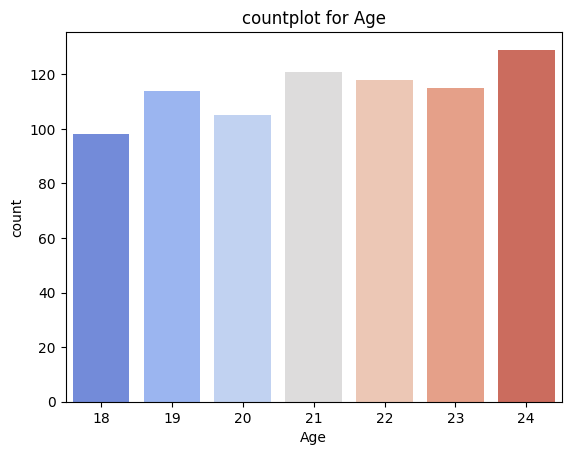

values distribution for Warmup_Routine_Adherence is 
 Warmup_Routine_Adherence
1    478
0    322
Name: count, dtype: int64


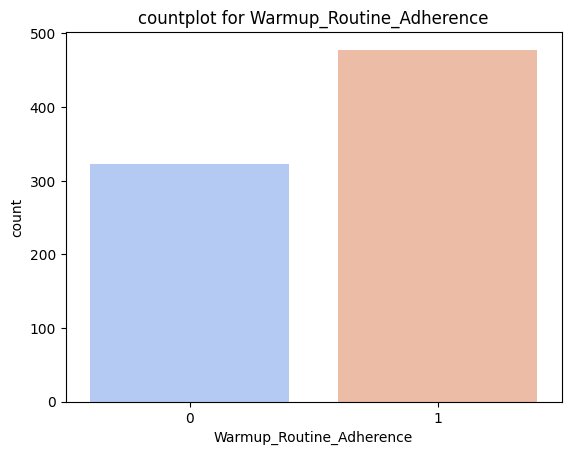

values distribution for Previous_Injury_Count is 
 Previous_Injury_Count
1    259
2    187
0    185
3    106
4     43
5     17
7      1
6      1
8      1
Name: count, dtype: int64


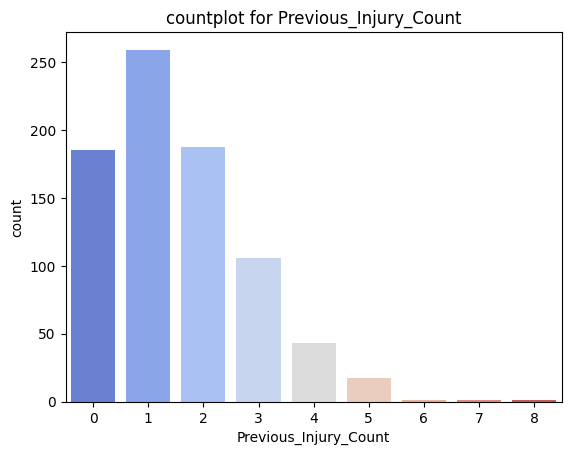

values distribution for Position is 
 Position
Midfielder    213
Defender      204
Forward       197
Goalkeeper    186
Name: count, dtype: int64


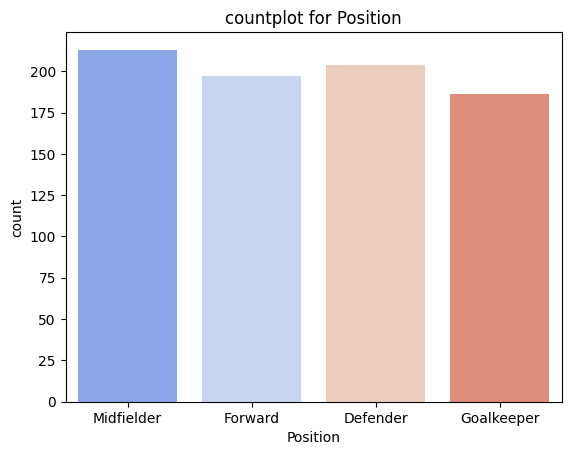

In [9]:
# lets plot for categorical columns
for col in cate:
    print(f"values distribution for {col } is \n {df[col].value_counts()}")
    
    sns.countplot(x = col,data = df,palette = "coolwarm")
    plt.title(f"countplot for {col}")
    plt.show()

observation
* IN MIDFILDER AND DEFENDER POSTION PLAYING PLAYER ARE MORE
*  Previous_Injury_Count HAS MOST FREQUENCY(1) WHICH MEANS PLAYER GET INJURIES 1 TIME ARE MORE
*  MOST OF PLAYERS ARE OF AGE 24 FOLLOWED BY AGE 21

values distribution for Age is 
 Injury_Next_Season  Age
0                   24     66
                    19     62
                    22     56
                    23     56
                    20     55
                    21     55
                    18     50
1                   21     66
                    24     63
                    22     62
                    23     59
                    19     52
                    20     50
                    18     48
Name: count, dtype: int64


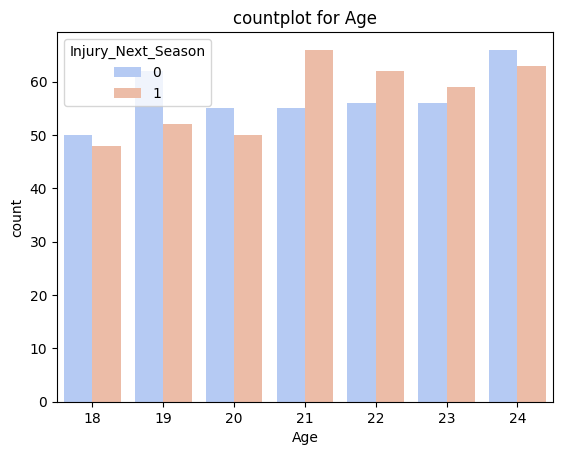

values distribution for Warmup_Routine_Adherence is 
 Injury_Next_Season  Warmup_Routine_Adherence
0                   1                           291
                    0                           109
1                   0                           213
                    1                           187
Name: count, dtype: int64


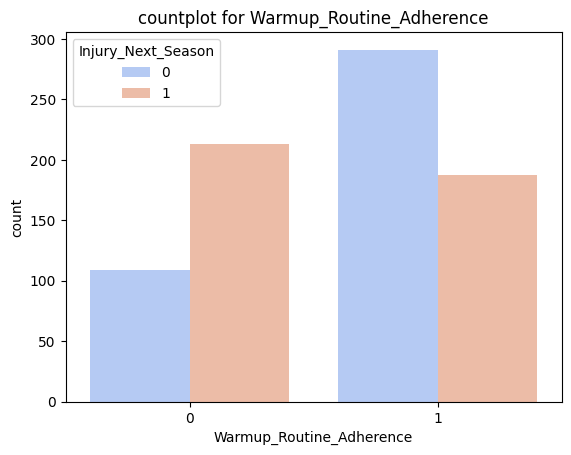

values distribution for Previous_Injury_Count is 
 Injury_Next_Season  Previous_Injury_Count
0                   1                        148
                    0                        138
                    2                         81
                    3                         27
                    4                          4
                    5                          2
1                   1                        111
                    2                        106
                    3                         79
                    0                         47
                    4                         39
                    5                         15
                    6                          1
                    7                          1
                    8                          1
Name: count, dtype: int64


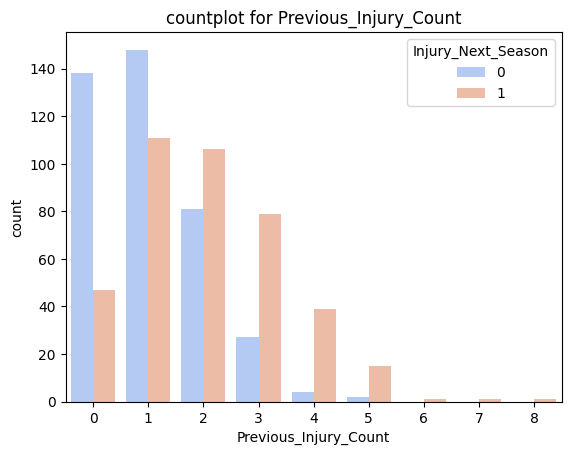

values distribution for Position is 
 Injury_Next_Season  Position  
0                   Midfielder    106
                    Defender      105
                    Goalkeeper     99
                    Forward        90
1                   Forward       107
                    Midfielder    107
                    Defender       99
                    Goalkeeper     87
Name: count, dtype: int64


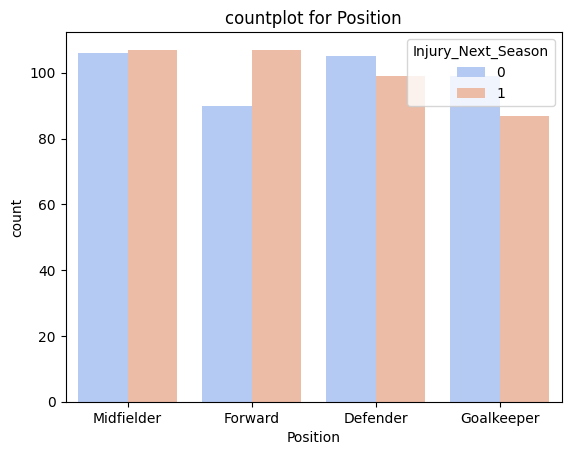

In [10]:
# lets plot for categorical columns vs target feature
for col in cate:
    print(f"values distribution for {col } is \n", df.groupby("Injury_Next_Season")[col].value_counts())
    
    sns.countplot(x = col,data = df,palette = "coolwarm",hue = "Injury_Next_Season")
    plt.title(f"countplot for {col}")
    plt.show()

OBSERVATION
* AS WE CAN CLEARLY OBSERVE THAT FORWARD AND MIDFILDER HAS MAXIMUM NUMBER OF INJURY IN NEXT SEASON
* WHO FOLLOWS Warmup_Routine_Adherence HAS MORE PRONE TO GETTING INJURY
* PLAYER AGE OF 24 GET MOST INJURY IN NEXT SEASON FOLLWED BY 21 & 22   

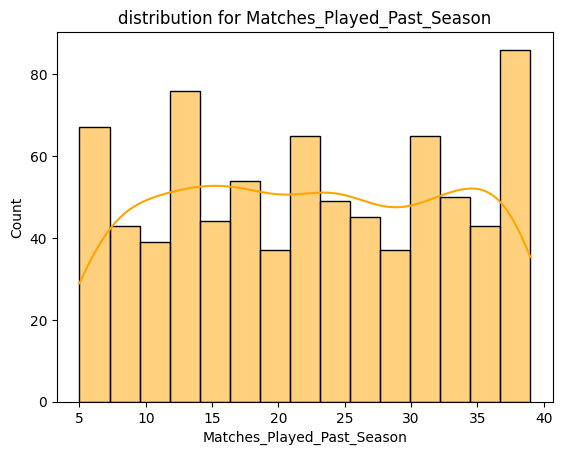

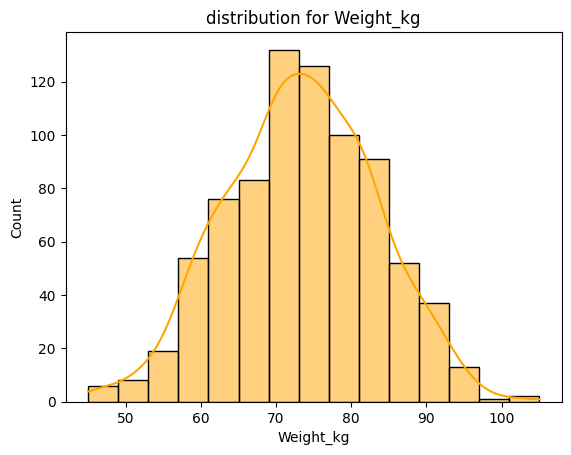

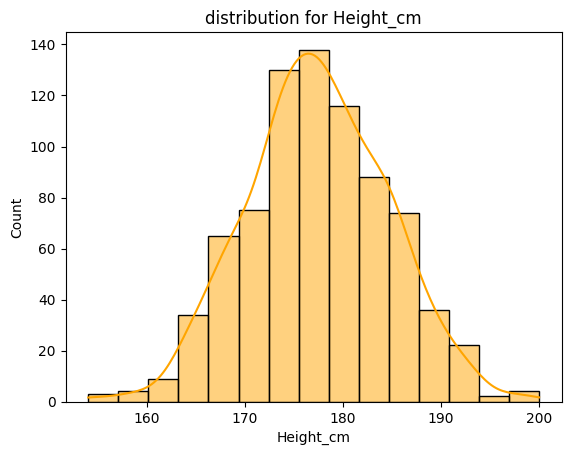

In [11]:
# LETS PLOT THE LESS CATEGORICAL VALUES
for i in almostcat:
    sns.histplot(x = i,data=df,color = "orange",bins = 15,kde = True)
    plt.title(f"distribution for {i}")
    plt.show()

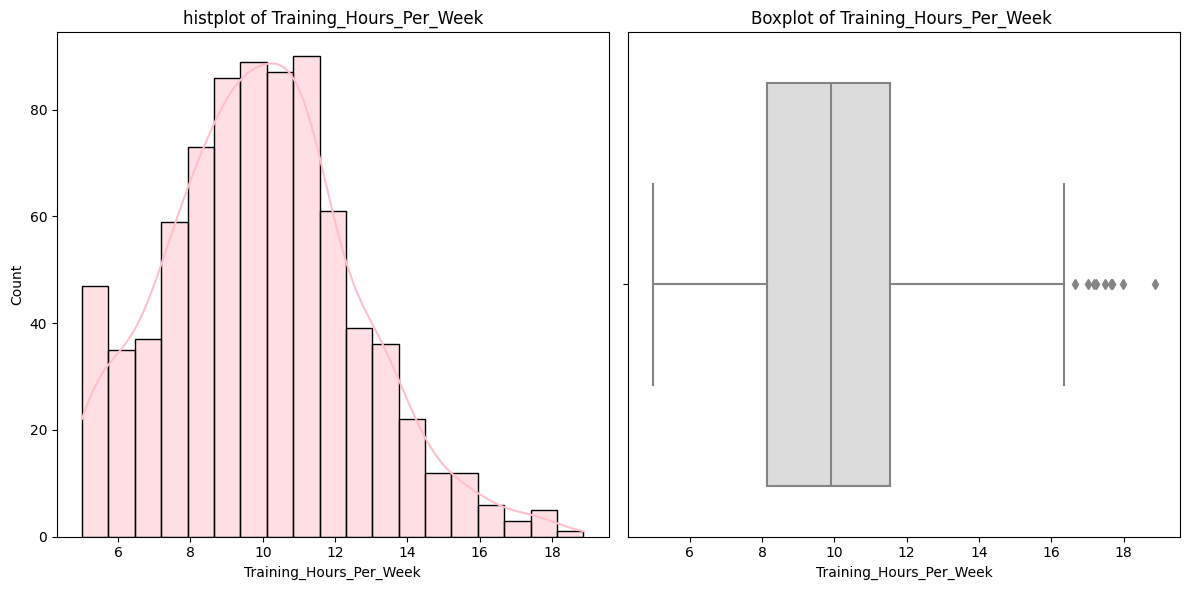

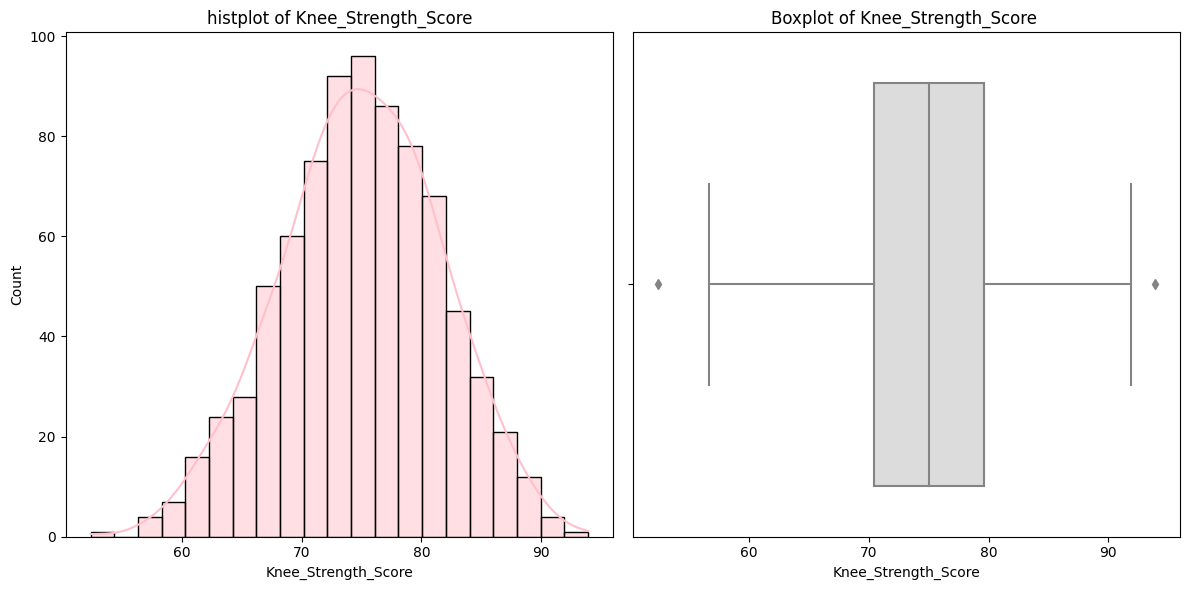

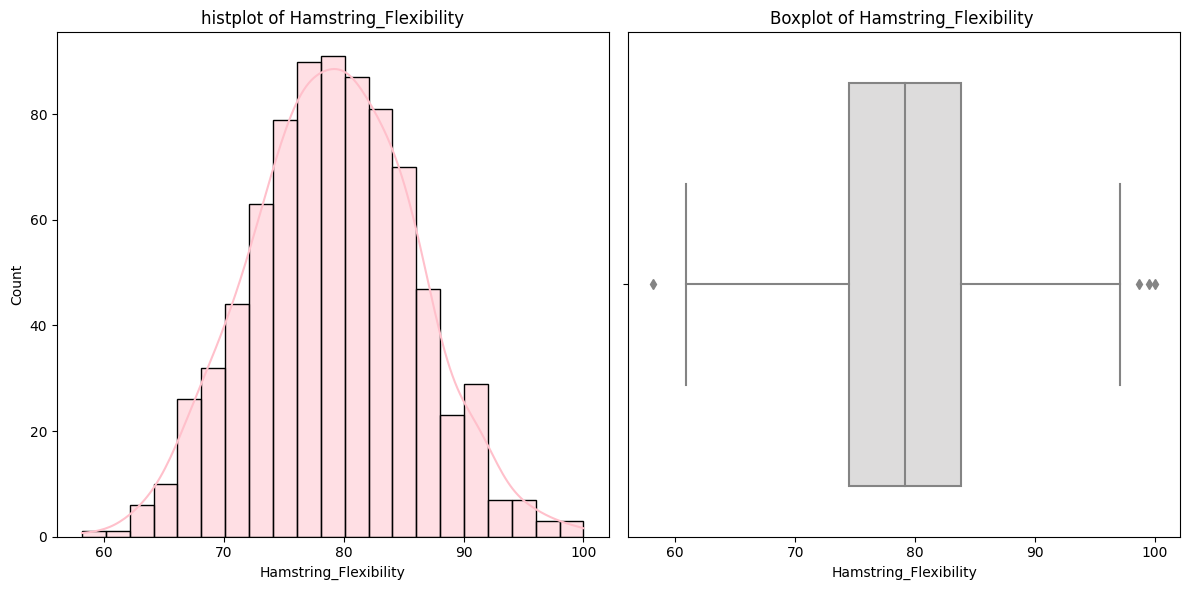

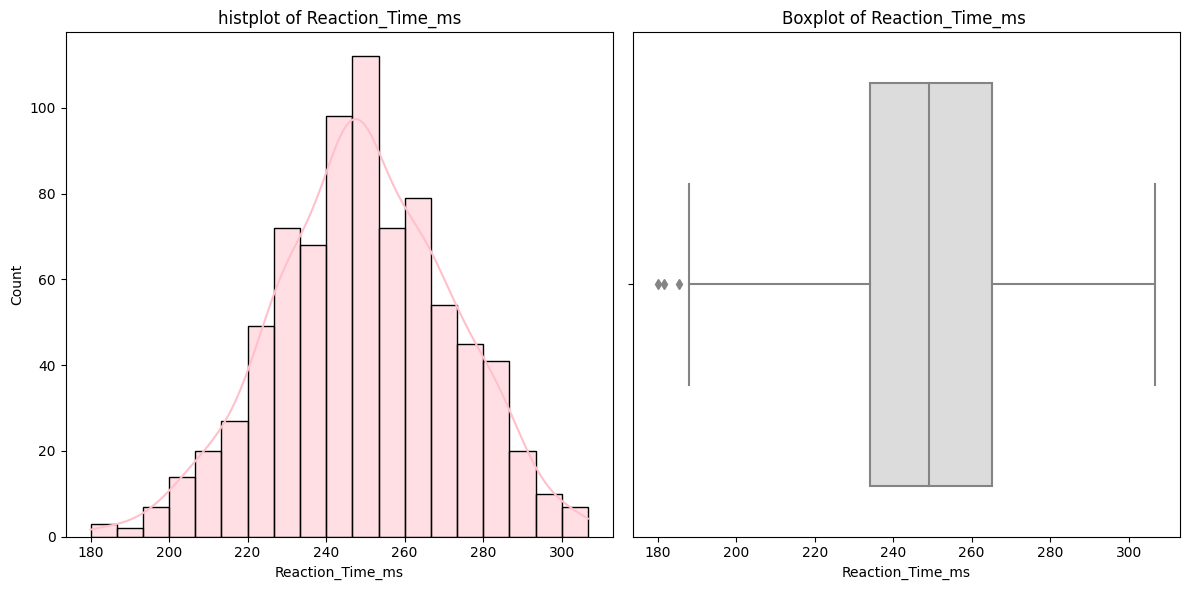

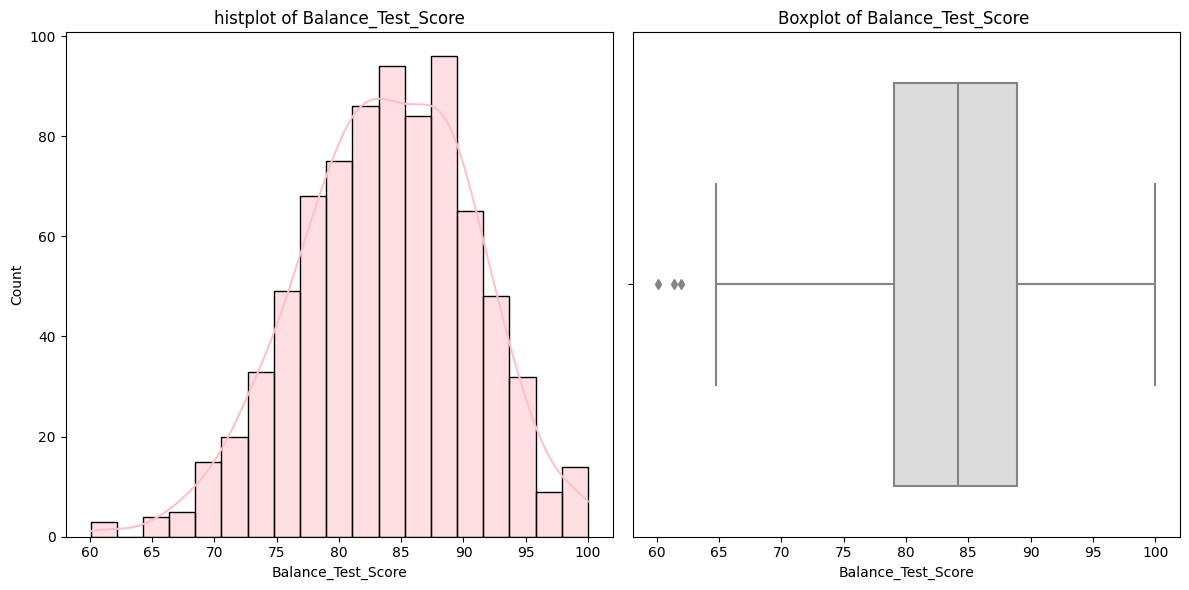

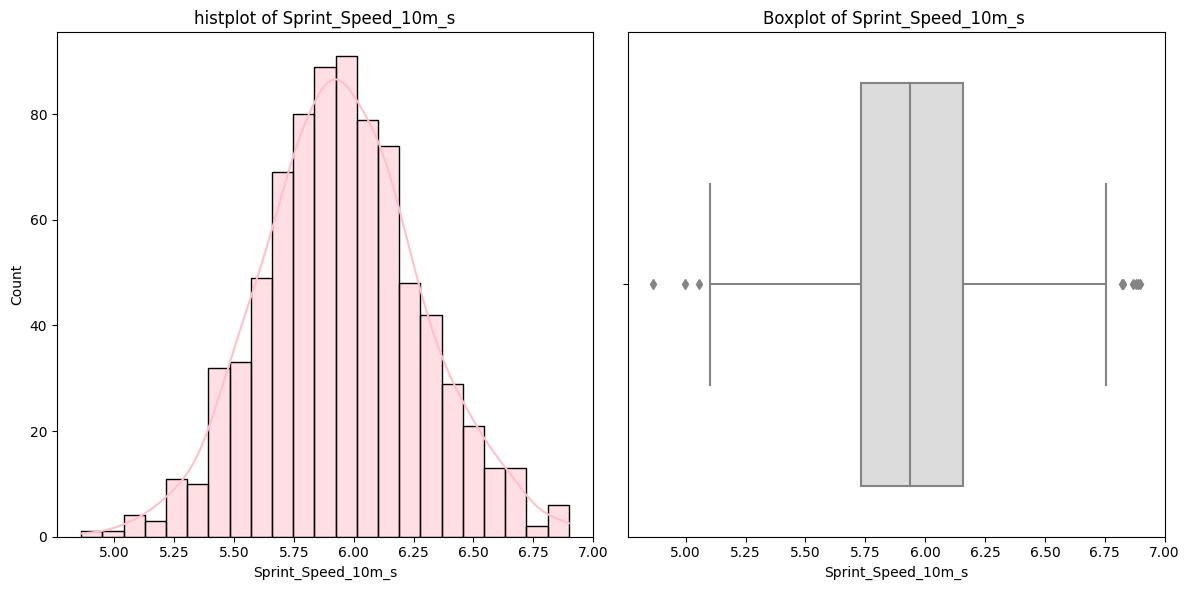

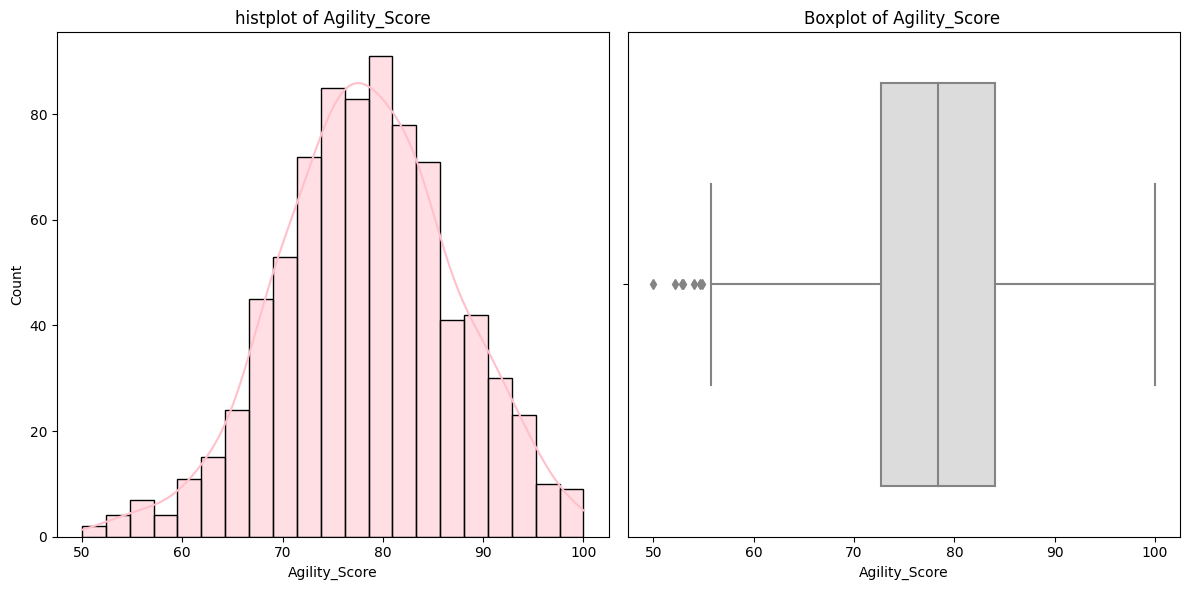

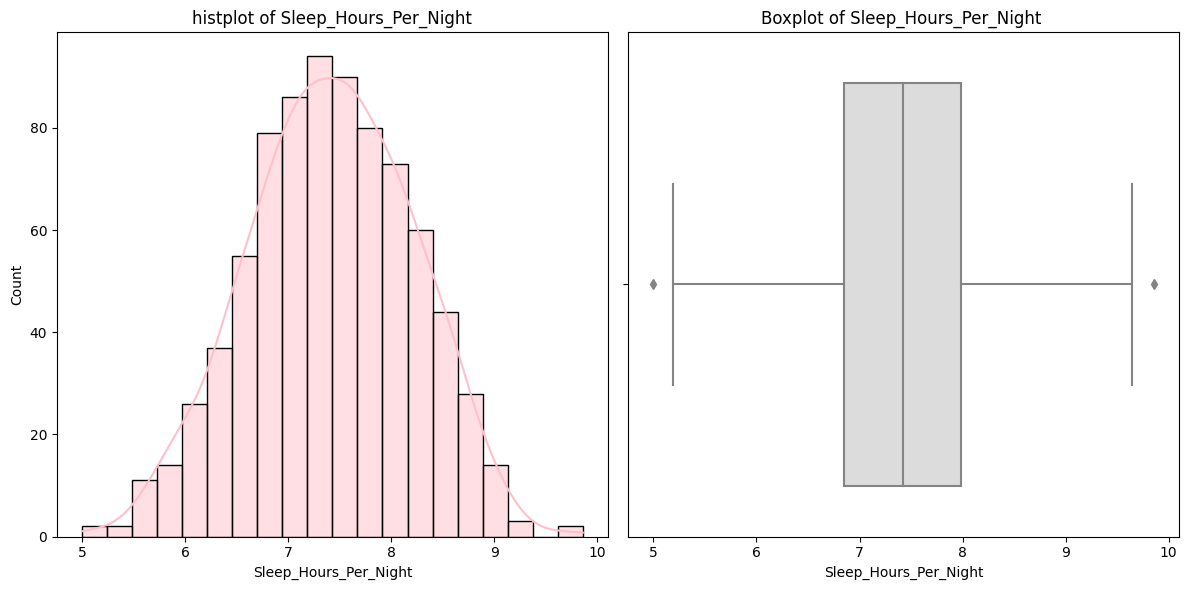

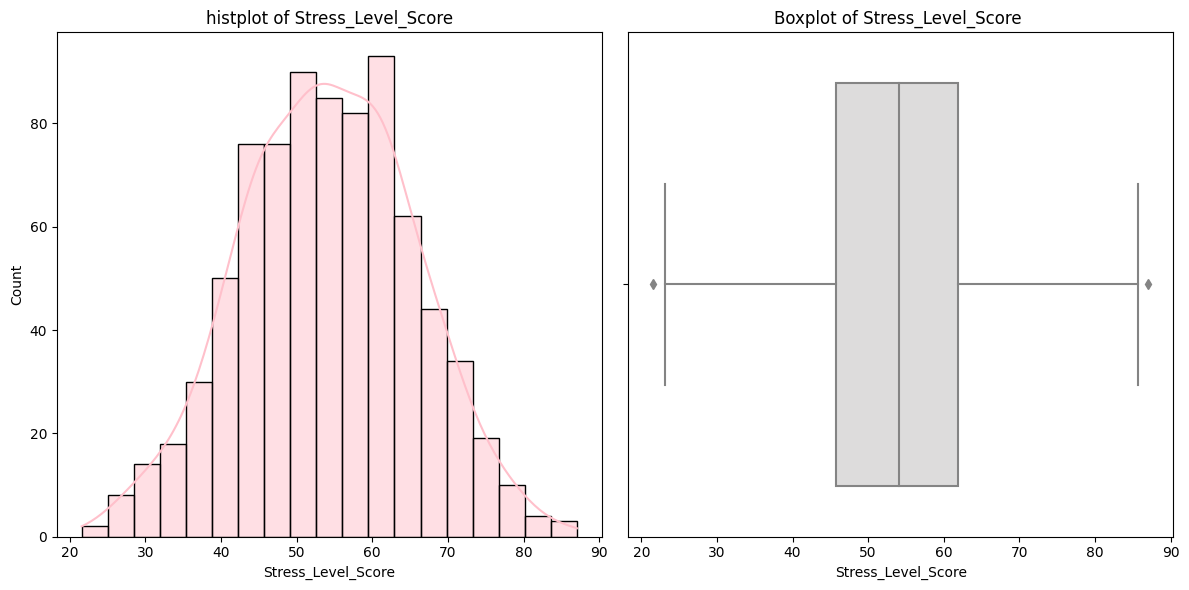

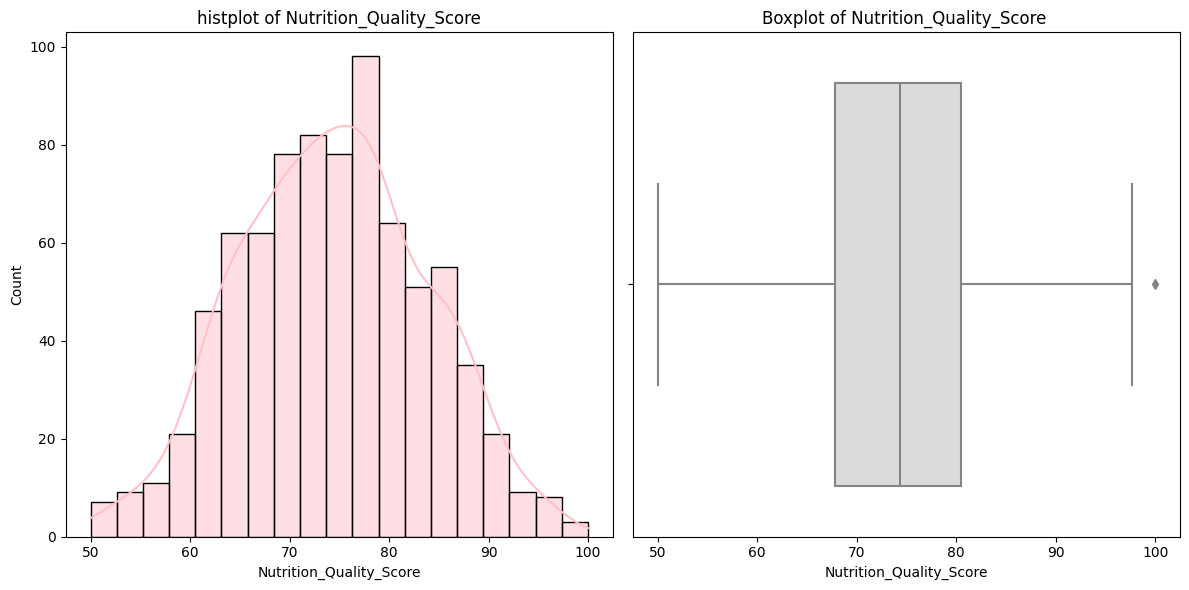

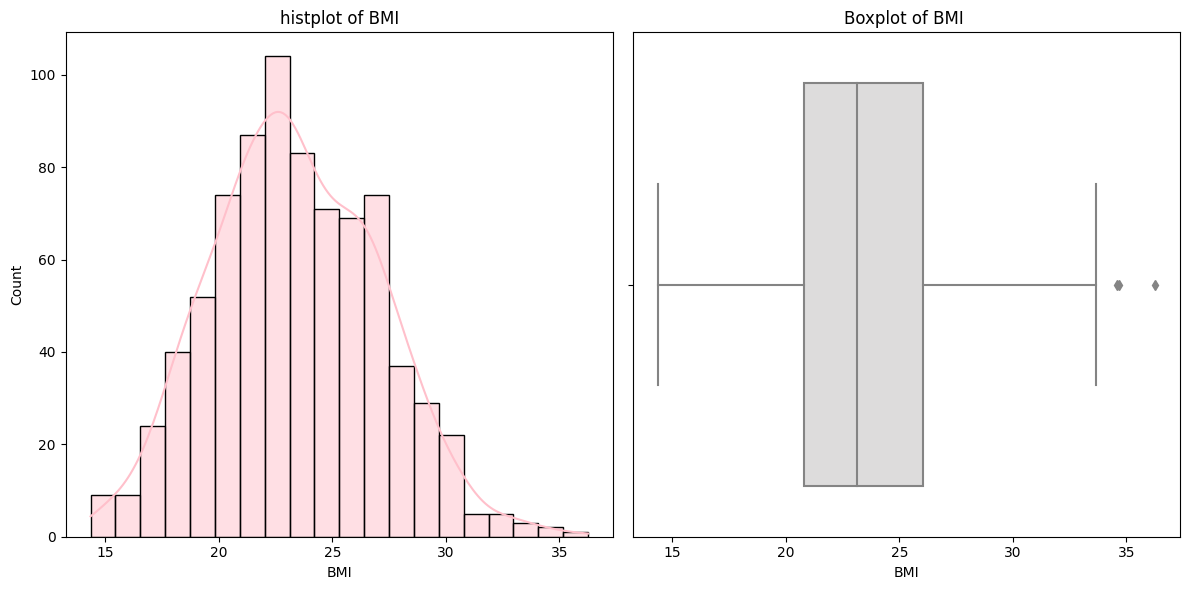

In [12]:
# DISTRIBUTION FOR NUMERICAL VALUES
for col in numerical:
    fig ,ax = plt.subplots(1,2,figsize = (12,6))
    sns.histplot(x= col ,data =df , color = "pink",ax = ax[0],kde = True)
    ax[0].set_title(f"histplot of {col}")
    sns.boxplot(x = col, data=df, palette="coolwarm", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col} ")
    
    plt.tight_layout()
    plt.show()
         
     

> observation 
* we clearly observe from boxplot there are some outliers
* from histplot we can learn that our data is normal distributed
 

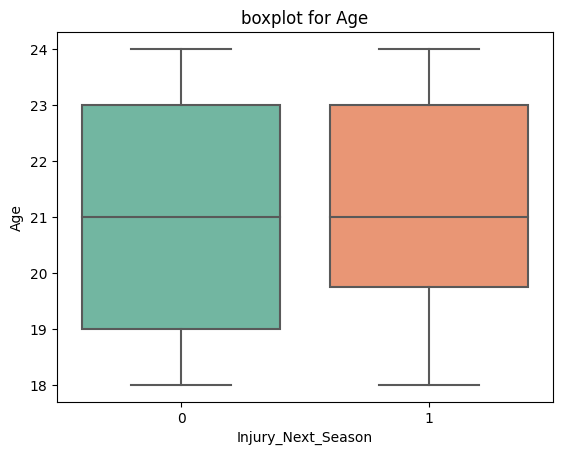

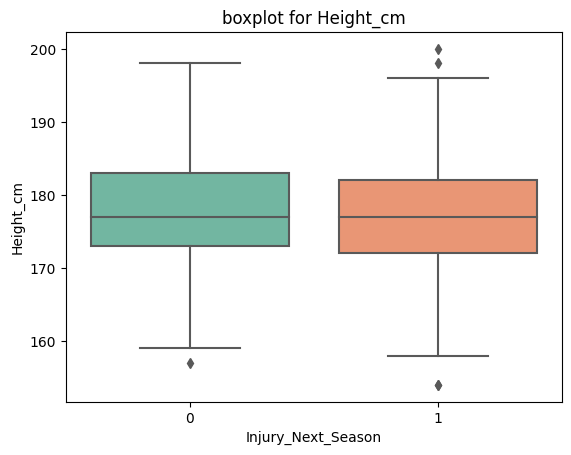

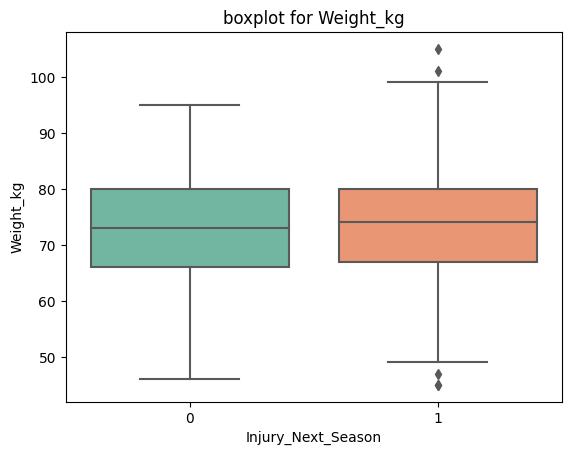

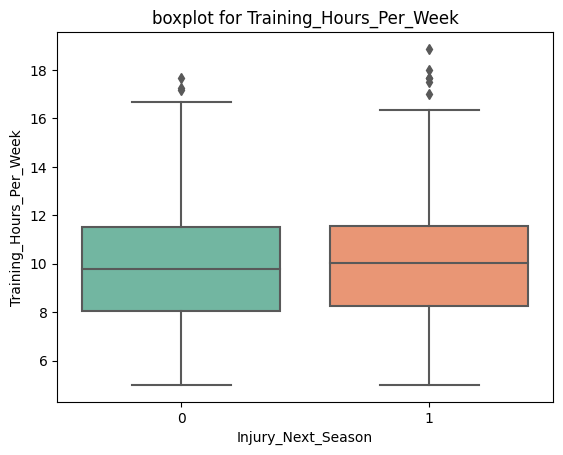

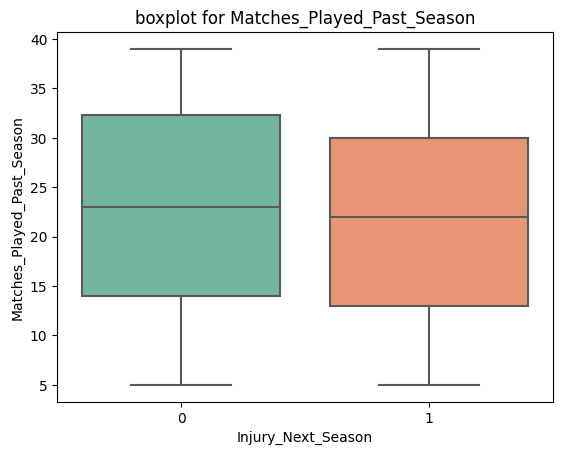

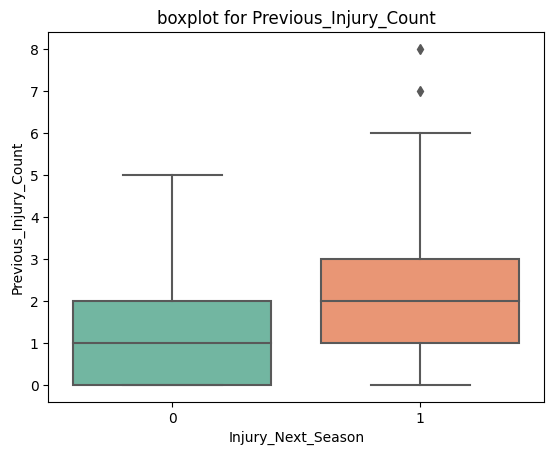

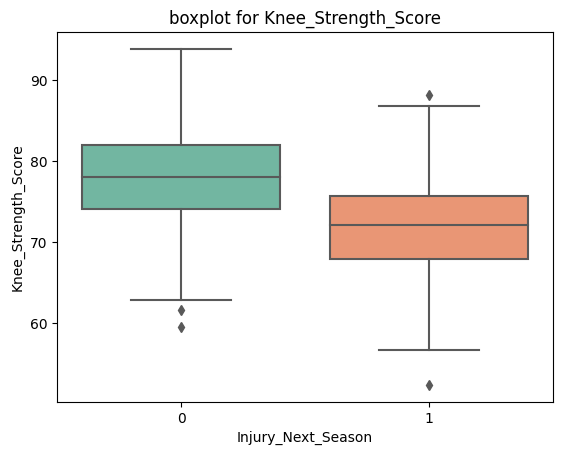

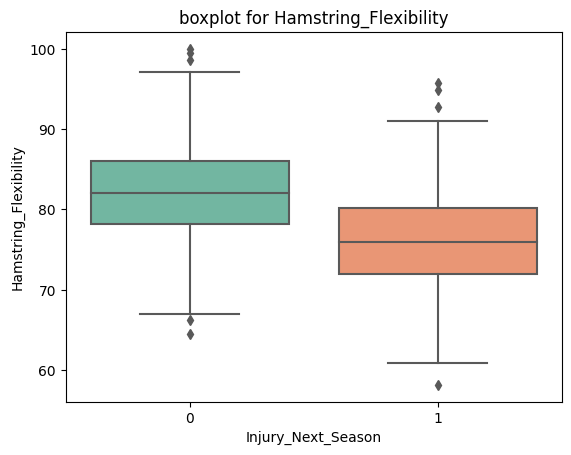

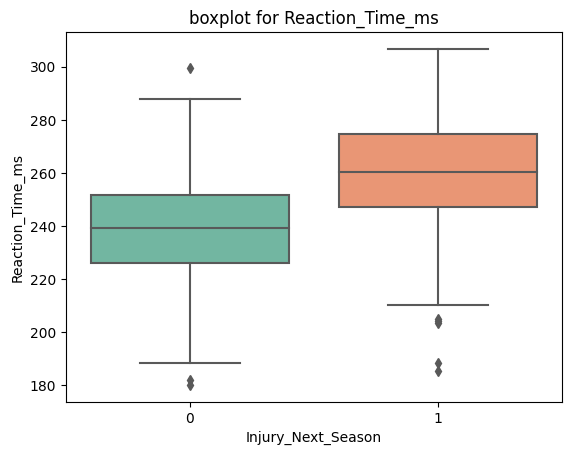

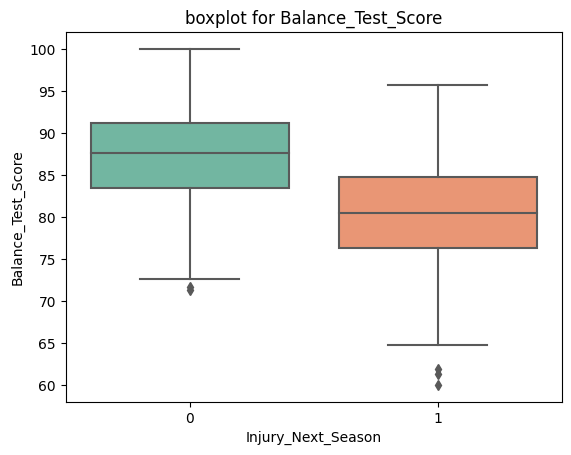

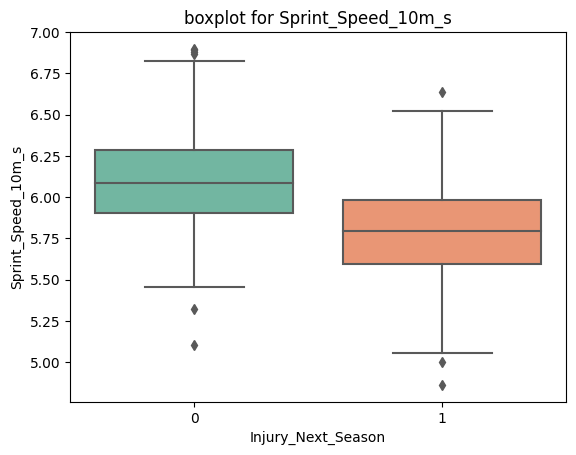

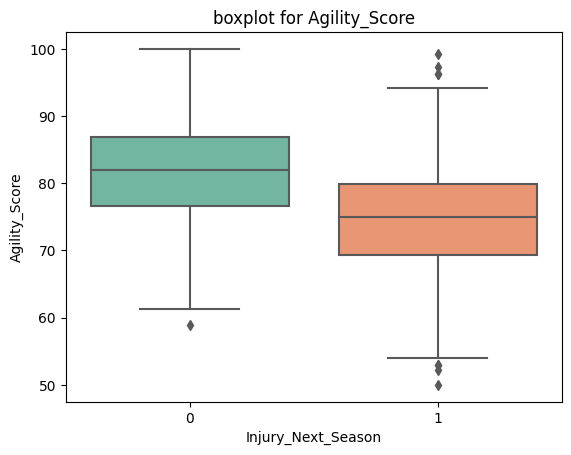

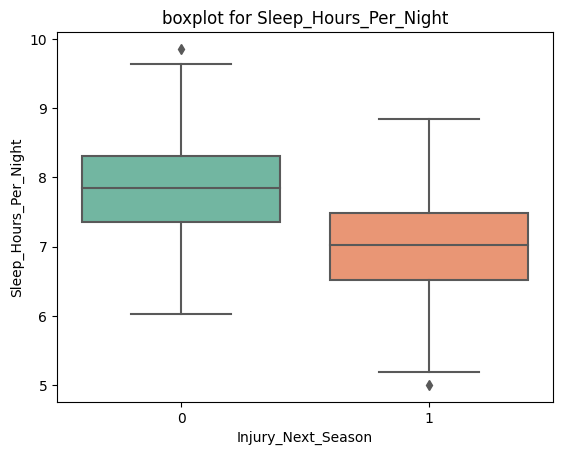

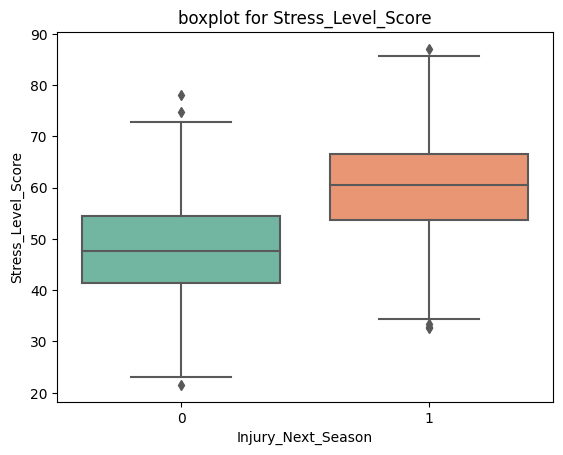

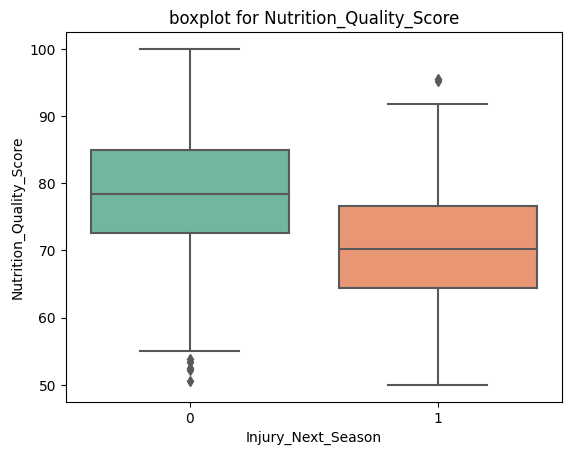

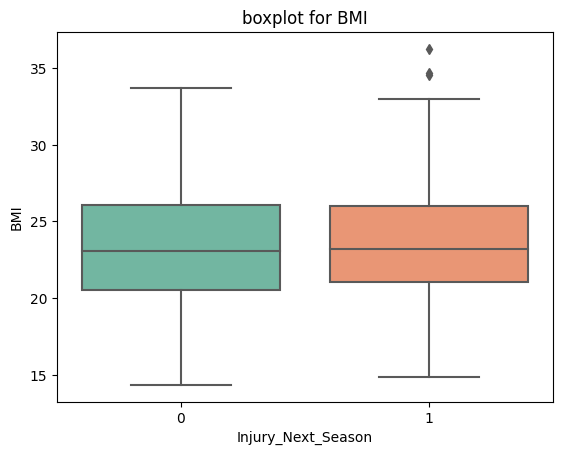

In [13]:
# boxplot for every feature to understand the values distrution ny injury in next season
for col in df.drop(columns = ["Injury_Next_Season","Position","Warmup_Routine_Adherence"]):
    sns.boxplot(x ="Injury_Next_Season",y= col,data = df ,palette = "Set2")
    plt.title(f"boxplot for {col}")
    plt.show()

**FEATURE IMPORTANCE**

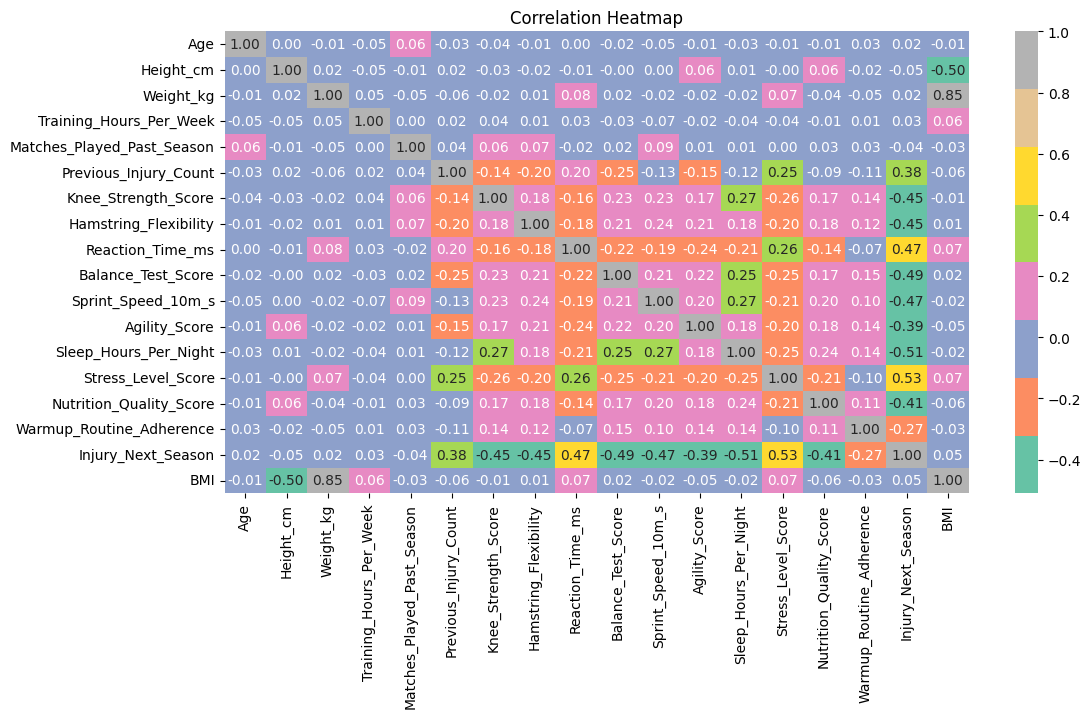

importance of feature with respect to Injury_Next_Season 

Injury_Next_Season            1.000000
Stress_Level_Score            0.529961
Reaction_Time_ms              0.470878
Previous_Injury_Count         0.382226
BMI                           0.047380
Training_Hours_Per_Week       0.033793
Age                           0.021359
Weight_kg                     0.021163
Matches_Played_Past_Season   -0.043910
Height_cm                    -0.054937
Warmup_Routine_Adherence     -0.265089
Agility_Score                -0.393681
Nutrition_Quality_Score      -0.412496
Hamstring_Flexibility        -0.450317
Knee_Strength_Score          -0.454551
Sprint_Speed_10m_s           -0.471499
Balance_Test_Score           -0.494814
Sleep_Hours_Per_Night        -0.510869
Name: Injury_Next_Season, dtype: float64


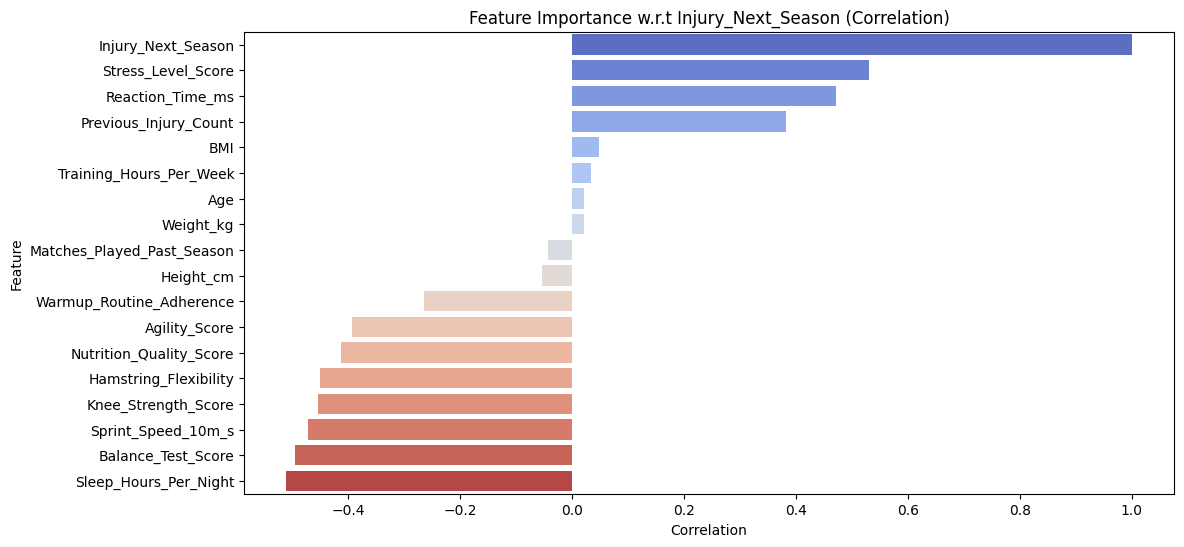

In [14]:
# corelation of numerical feature 
cor = df.select_dtypes(include = np.number).corr()

plt.figure(figsize = (12,6))
sns.heatmap(cor, annot=True, cmap='Set2', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# find importance to our target feature Injury_Next_Season
imp = cor["Injury_Next_Season"].sort_values(ascending = False)
print(f"importance of feature with respect to Injury_Next_Season \n\n{imp}")
imp_df = imp.reset_index()
imp_df.columns = ["Feature", "Correlation"]

plt.figure(figsize=(12,6))
sns.barplot(x="Correlation", y="Feature", data=imp_df, palette="coolwarm")
plt.title("Feature Importance w.r.t Injury_Next_Season (Correlation)")
plt.show()

## 📌 Observations

    1) Feature-Target Relationships:
        • Strong positive contributors (risk factors):
            - Stress_Level_Score (+0.53)
            - Reaction_Time_ms (+0.47)
            - Previous_Injury_Count (+0.38)
          → These features increase the chances of future injury.

        • Strong negative contributors (protective factors):
            - Sleep_Hours_Per_Night (-0.51)
            - Balance_Test_Score (-0.49)
            - Sprint_Speed_10m_s (-0.47)
            - Knee_Strength_Score (-0.45)
            - Hamstring_Flexibility (-0.45)
          → These features reduce the likelihood of injury.

    2) Distribution Analysis:
        • From histograms, most numerical features show an approximately 
          normal distribution, which supports the suitability of scaling techniques.  
        • Boxplots reveal the presence of some outliers in the dataset, 
          which may represent extreme cases of players with unique 
          physical or lifestyle attributes.

    3) Categorical & Demographic Insights:
        • Midfielders and Defenders are the most common playing positions 
          among players in the dataset.  
        • Previous_Injury_Count shows the highest frequency at 1, 
          meaning most players have had exactly one injury in the past.  
        • Majority of players are aged 24, followed by age 21, 
          reflecting the typical age distribution of university-level athletes.


## FEATURE ENG

In [15]:
# HERE WE KNOW THAT OUR DATASET HAS POSITION FEATURE WHICH MUST BE ENCODED FIRST
# WE PERFORM OHE FOR POSITION
dffinal= pd.get_dummies(df,columns = ["Position"],dtype = "int",drop_first=True)
print(dffinal.shape)

(800, 21)


## MODELLING


In [16]:
# SPLITTING DATA
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dffinal.drop(columns = "Injury_Next_Season"),dffinal["Injury_Next_Season"],test_size = 0.2,random_state = 1)

In [17]:
# LETS DO NORMILAZITION FOR BEST RESULTS
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainscale = ss.fit_transform(xtrain)
xtestscale = ss.transform(xtest)


In [18]:
# IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
logr = LogisticRegression(n_jobs = -1,max_iter = 1000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_jobs = -1)
adboost =AdaBoostClassifier()
bag = BaggingClassifier(n_jobs = -1)
knn = KNeighborsClassifier(n_jobs = -1)
models=[logr,tree,forest,adboost,bag,knn,svm_model]

In [19]:
from sklearn.metrics import accuracy_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = accuracy_score(ytest,i.predict(xtest))
    print(f"accuracy_score for {i }",r2)

    result[i] = r2*100    
    print("\n====================\n")

LogisticRegression(max_iter=1000, n_jobs=-1) succesfully trained
accuracy_score for LogisticRegression(max_iter=1000, n_jobs=-1) 0.9125


DecisionTreeClassifier() succesfully trained
accuracy_score for DecisionTreeClassifier() 0.86875


RandomForestClassifier(n_jobs=-1) succesfully trained
accuracy_score for RandomForestClassifier(n_jobs=-1) 0.90625


AdaBoostClassifier() succesfully trained
accuracy_score for AdaBoostClassifier() 0.89375


BaggingClassifier(n_jobs=-1) succesfully trained
accuracy_score for BaggingClassifier(n_jobs=-1) 0.89375


KNeighborsClassifier(n_jobs=-1) succesfully trained
accuracy_score for KNeighborsClassifier(n_jobs=-1) 0.85


SVC(probability=True, random_state=42) succesfully trained
accuracy_score for SVC(probability=True, random_state=42) 0.8875




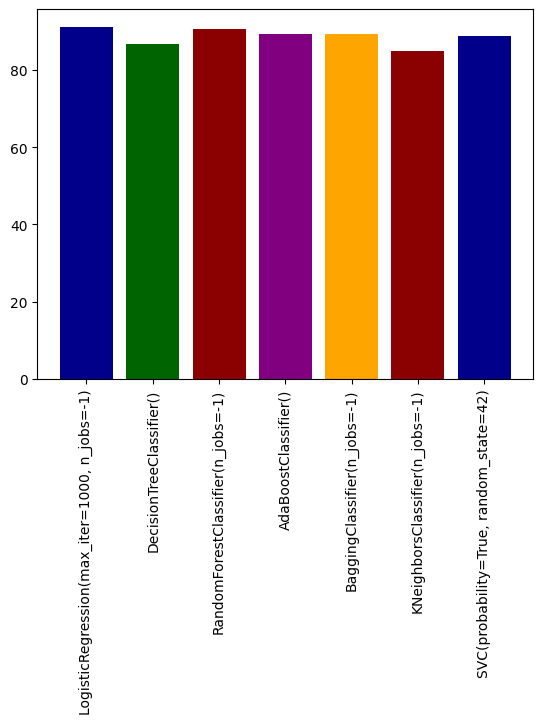

In [20]:
 # plot for differnt model
plt.bar([str(k) for k in result.keys()],result.values(), color=["darkblue","darkgreen","darkred","purple","orange","darkred"])
plt.xticks(rotation = 90)
plt.show()

## 📌 Conclusion

    In this study, we developed and compared multiple machine learning 
    classifiers to predict whether university football players will 
    suffer an injury in the next academic season. 

    ✅ Key Findings:
        • Logistic Regression achieved the highest accuracy (91.25%), 
          showing that linear relationships between features and the 
          injury outcome are strong enough for reliable predictions.
        
        • Ensemble models such as Random Forest (89.38%), 
          AdaBoost (89.38%), and Bagging (88.75%) also performed 
          competitively, indicating that combining weak learners 
          enhances predictive stability.
        
        • The Support Vector Classifier (SVC) delivered solid performance 
          (88.75%), highlighting the importance of non-linear decision 
          boundaries in capturing complex injury risk patterns.
        
        • Simpler models like Decision Tree (88.13%) and KNN (85.00%) 
          performed reasonably but were outperformed by logistic and 
          ensemble approaches.

    🎯 Final Insight:
        Logistic Regression stands out as the most effective model 
        in this dataset, balancing interpretability and accuracy. 
        However, ensemble methods such as Random Forest and AdaBoost 
        remain strong alternatives, especially in cases where 
        model robustness and non-linear interactions are important.

    🚀 Next Steps:
        • Perform hyperparameter tuning to further optimize model 
          performance.
        • Explore feature importance and SHAP analysis to better 
          understand risk factors contributing to player injuries.
        • Extend the approach with deep learning models to evaluate 
          potential improvements in predictive accuracy.
